In [1]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

--2019-06-06 12:20:14--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.75.172.154, 2a02:26f0:a00:292::e59, 2a02:26f0:a00:2ab::e59
Connecting to download.microsoft.com (download.microsoft.com)|104.75.172.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M  60.2MB/s    in 21s     

2019-06-06 12:20:36 (36.8 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



In [0]:
!unzip kagglecatsanddogs_3367a.zip

In [0]:
!ls -lh PetImages/Cat

In [3]:
!ls -lh

total 787M
-rw-r--r-- 1 root root 787M Oct 13  2018  kagglecatsanddogs_3367a.zip
-rw-r--r-- 1 root root  35K Feb 10  2017 'MSR-LA - 3467.docx'
drwxr-xr-x 4 root root 4.0K Jun  6 12:20  PetImages
-rw-r--r-- 1 root root  104 Feb 10  2017 'readme[1].txt'
drwxr-xr-x 1 root root 4.0K May 31 16:17  sample_data


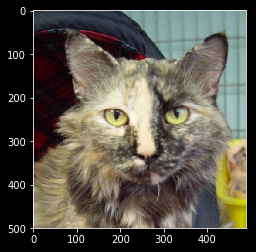

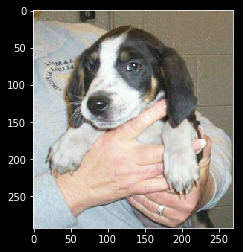

In [4]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import matplotlib.image as mpimg
import numpy as np

img=mpimg.imread('PetImages/Cat/10.jpg')
imgplot = plt.imshow(img)
plt.show()

img=mpimg.imread('PetImages/Dog/10.jpg')
imgplot = plt.imshow(img)
plt.show()

In [0]:
import tensorflow as tf
tf.enable_eager_execution()
AUTOTUNE = tf.data.experimental.AUTOTUNE

from os import listdir

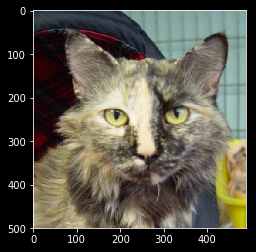

In [6]:
image = tf.read_file('/content/PetImages/Cat/10.jpg')
image = tf.image.decode_jpeg(image, channels=3)
plt.imshow(image)

In [0]:
cat_images = listdir(path='/content/PetImages/Cat')
dog_images = listdir(path='/content/PetImages/Dog')

all_image_paths = []
all_image_labels = []
count = 0
for el in cat_images:
  try:    
    image = tf.read_file('/content/PetImages/Cat/'+el)
    image = tf.image.decode_jpeg(image, channels=3)
    all_image_paths.append('/content/PetImages/Cat/'+el)
    all_image_labels.append(0)
  except:
    count += 1
    
#print(count)
count = 0

for el in dog_images:
  try:
    image = tf.read_file('/content/PetImages/Dog/'+el)
    image = tf.image.decode_jpeg(image, channels=3)
    all_image_paths.append('/content/PetImages/Dog/'+el)
    all_image_labels.append(1)
  except:
    count +=1
    
#print(count)

In [8]:
all_image_paths[:10]

['/content/PetImages/Cat/1734.jpg',
 '/content/PetImages/Cat/3828.jpg',
 '/content/PetImages/Cat/10238.jpg',
 '/content/PetImages/Cat/9054.jpg',
 '/content/PetImages/Cat/3666.jpg',
 '/content/PetImages/Cat/7712.jpg',
 '/content/PetImages/Cat/11681.jpg',
 '/content/PetImages/Cat/7319.jpg',
 '/content/PetImages/Cat/2797.jpg',
 '/content/PetImages/Cat/5433.jpg']

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_image_paths,all_image_labels,test_size=0.10,stratify=all_image_labels)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.10,stratify=y_train)

In [10]:
np.sum([X_test[i][19:22]=='Dog' for i in range(len(X_val))])

1121

In [11]:
np.sum([X_test[i][19:22]=='Cat' for i in range(len(X_val))])

1114

In [12]:
sum(all_image_labels)

12397

In [13]:
tf.data.Dataset.from_tensor_slices(X_train)

<DatasetV1Adapter shapes: (), types: tf.string>

In [0]:
def load_and_preprocess_image(path):
  image = tf.read_file(path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize_images(image, [64, 64])
  image /= 255.0
  return image

In [0]:
train_ds = tf.data.Dataset.from_tensor_slices(X_train)
train_ds = train_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

train_label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(y_train, tf.int64))

train_ds = tf.data.Dataset.zip((train_ds, train_label_ds))

val_ds = tf.data.Dataset.from_tensor_slices(X_val)
val_ds = val_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
val_label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(y_val, tf.int64))
val_ds = tf.data.Dataset.zip((val_ds, val_label_ds))

In [17]:
train_ds

<DatasetV1Adapter shapes: ((64, 64, 3), ()), types: (tf.float32, tf.int64)>

Instructions for updating:
Colocations handled automatically by placer.


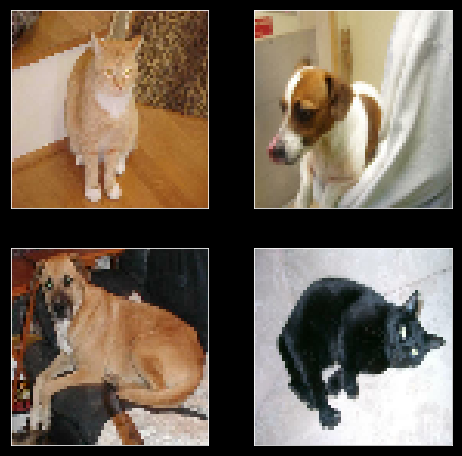

In [16]:
plt.figure(figsize=(8,8))
for n,[image,label] in enumerate(train_ds.take(4)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

In [18]:
64*64

4096

In [19]:
print('image shape: ', train_ds.output_shapes[0])
print('label shape: ', train_ds.output_shapes[1])
print('types: ', train_ds.output_types)
print()
print(train_ds)

image shape:  (64, 64, 3)
label shape:  ()
types:  (tf.float32, tf.int64)

<DatasetV1Adapter shapes: ((64, 64, 3), ()), types: (tf.float32, tf.int64)>


https://www.tensorflow.org/tutorials/load_data/images

To train a model with this dataset you will want the data:

1.   To be well shuffled
2.   To be batched
3.   To repeat forever
4.   Batches to be available as soon as possible

using the tf.data api.

In [0]:
BATCH_SIZE = 32

train_ds = train_ds.cache()
train_ds = train_ds.shuffle(buffer_size=len(X_train))
train_ds = train_ds.repeat()
train_ds = train_ds.batch(BATCH_SIZE)
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)

val_ds = val_ds.cache().batch(BATCH_SIZE)

http://cs231n.github.io/assets/conv-demo/index.html

![picture](https://raw.githubusercontent.com/MLJCUnito/Tensorshow/master/SecondLecture/images/pooling.png)

In [22]:
# Convolutional Neural Network

# Part 1 - Building the CNN

# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

# Initialising the CNN
Pet_classifier = Sequential()

Pet_classifier.add(Convolution2D(32, 2, 2, input_shape = (64, 64, 3), activation = 'relu'))

Pet_classifier.add(MaxPooling2D(pool_size = (2, 2)))

Pet_classifier.add(Convolution2D(64, 2, 2, activation = 'relu'))

Pet_classifier.add(MaxPooling2D(pool_size = (2, 2)))

Pet_classifier.add(Flatten())

Pet_classifier.add(Dense(64, activation = 'relu',kernel_regularizer=l2(0.1), bias_regularizer=l2(0.1)))

#Pet_classifier.add(Dropout(0.2))

Pet_classifier.add(Dense(1, activation = 'sigmoid'))

# Compiling the CNN
Pet_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
Pet_classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                65600     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total para

In [23]:
train_steps_per_epoch=np.ceil(len(X_train)/BATCH_SIZE).astype(int)
val_steps_per_epoch=np.ceil(len(X_val)/BATCH_SIZE).astype(int)

history = Pet_classifier.fit(train_ds,
                             steps_per_epoch = train_steps_per_epoch,
                             epochs = 50,
                             validation_data = val_ds,
                             validation_steps = val_steps_per_epoch)

Epoch 1/50
Instructions for updating:
Use tf.cast instead.
629/629 [==============================] - 26s 41ms/step - loss: 1.0924 - acc: 0.5349 - val_loss: 0.6775 - val_acc: 0.6304
Epoch 2/50
629/629 [==============================] - 6s 10ms/step - loss: 0.6682 - acc: 0.6234 - val_loss: 0.6500 - val_acc: 0.6617
Epoch 3/50
629/629 [==============================] - 6s 10ms/step - loss: 0.6434 - acc: 0.6613 - val_loss: 0.6348 - val_acc: 0.6796
Epoch 4/50
629/629 [==============================] - 6s 10ms/step - loss: 0.6215 - acc: 0.6872 - val_loss: 0.6197 - val_acc: 0.6931
Epoch 5/50
629/629 [==============================] - 6s 10ms/step - loss: 0.6024 - acc: 0.7052 - val_loss: 0.5951 - val_acc: 0.7096
Epoch 6/50
629/629 [==============================] - 6s 10ms/step - loss: 0.5902 - acc: 0.7130 - val_loss: 0.6113 - val_acc: 0.7065
Epoch 7/50
629/629 [==============================] - 6s 10ms/step - loss: 0.5792 - acc: 0.7191 - val_loss: 0.5936 - val_acc: 0.7096
Epoch 8/50
629/629 [

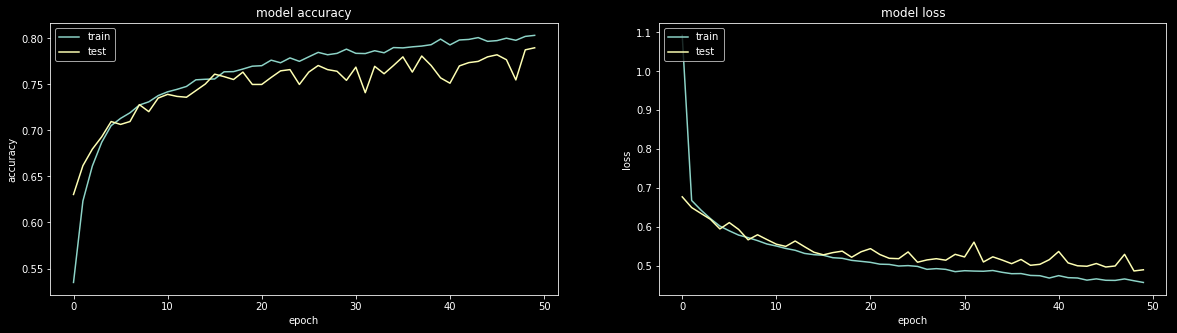

In [24]:
# summarize history for accuracy

F, axes = plt.subplots(1,2,figsize=(20,5))

axes[0].plot(history.history['acc'])
axes[0].plot(history.history['val_acc'])
axes[0].set_title('model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'test'], loc='upper left')

# summarize history for loss

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('model loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['train', 'test'], loc='upper left')

In [25]:
# serialize model to JSON
model_json = Pet_classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
Pet_classifier.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [29]:
import tensorflow as tf
tf.executing_eagerly()
from tensorflow.keras.models import model_from_json

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [30]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                65600     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total para

# Final Test

![picture](https://raw.githubusercontent.com/MLJCUnito/Tensorshow/master/SecondLecture/images/dog.jpeg)

In [52]:
!wget https://raw.githubusercontent.com/MLJCUnito/Tensorshow/master/SecondLecture/images/https://raw.githubusercontent.com/MLJCUnito/Tensorshow/master/SecondLecture/images/dog.jpeg

--2019-06-06 12:45:51--  https://raw.githubusercontent.com/MLJCUnito/Tensorshow/master/SecondLecture/images/https://raw.githubusercontent.com/MLJCUnito/Tensorshow/master/SecondLecture/images/dog.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4386 (4.3K) [image/jpeg]
Saving to: ‘dog.jpeg.1’

dog.jpeg.1          100%[===================>]   4.28K  --.-KB/s    in 0s      

2019-06-06 12:45:51 (100 MB/s) - ‘dog.jpeg.1’ saved [4386/4386]



In [0]:
test = tf.expand_dims(load_and_preprocess_image('/content/dog.jpeg'),axis=0)

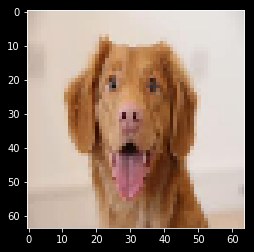

In [47]:
plt.imshow(load_and_preprocess_image('/content/dog.jpeg'))

In [48]:
loaded_model.predict(test,steps=1)

array([[0.9532861]], dtype=float32)

![picture](https://raw.githubusercontent.com/MLJCUnito/Tensorshow/master/SecondLecture/images/my_dog.jpg)

In [41]:
!wget https://raw.githubusercontent.com/MLJCUnito/Tensorshow/master/SecondLecture/images/my_dog.jpg

--2019-06-06 12:42:34--  https://raw.githubusercontent.com/MLJCUnito/Tensorshow/master/SecondLecture/images/my_dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 760648 (743K) [image/jpeg]
Saving to: ‘my_dog.jpg’

my_dog.jpg          100%[===================>] 742.82K  --.-KB/s    in 0.02s   

2019-06-06 12:42:34 (33.2 MB/s) - ‘my_dog.jpg’ saved [760648/760648]



In [0]:
test = tf.expand_dims(load_and_preprocess_image('/content/my_dog.jpg'),axis=0)

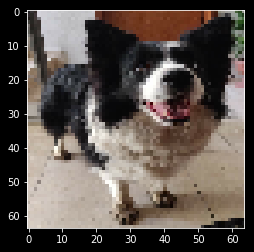

In [50]:
plt.imshow(load_and_preprocess_image('/content/my_dog.jpg'))

In [51]:
loaded_model.predict(test,steps=1)

array([[0.7319769]], dtype=float32)